In [2]:
import pandas as pd
import os
import numpy as np
import joblib
from functools import reduce
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
import shap
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.multiclass import OneVsRestClassifier
# from skmultilearn.model_selection import MultiLabelStratifiedKFold
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from joblib import dump
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [3]:
# breed
feat_breed = pd.read_pickle('../features/breed.pkl')
feat_breed_v2 = pd.read_pickle('../features/breed_v2.pkl')

feat_breed_top50 = pd.read_pickle('../features/breed_top50.pkl')
feat_breed_top50_v2 = pd.read_pickle('../features/breed_top50_v2.pkl')

feat_breed_group = pd.read_pickle('../features/breed_group.pkl')
feat_sub_breed = pd.read_pickle('../features/sub_breed.pkl')
feat_breed_type = pd.read_pickle('../features/breed_type.pkl')

feat_breed_pure_or_mix = pd.read_pickle('../features/breed_pure_or_mix.pkl')

# age
feat_age = pd.read_csv('../features/age_with_id.csv')

# sex
feat_sex = pd.read_csv('../features/one_hot_encoded_sex_with_id.csv')

# weight
feat_weight = pd.read_pickle('../features/weight.pkl')

# Climate
# feat_HotWheater = pd.read_csv('../features/one_hot_encoded_HotWheater_with_id.csv')
# feat_ModerateWheather = pd.read_csv('../features/one_hot_encoded_ModerateWheather_with_id.csv')
# feat_ColdWheater_with_id = pd.read_csv('../features/one_hot_encoded_ColdWheater_with_id.csv')
feat_cold_month = pd.read_pickle('../features/ColdMonths.pkl')
feat_hot_month = pd.read_pickle('../features/HotMonths.pkl')

# Diet
feat_diet = pd.read_pickle('../features/diet.pkl') # 5 columns

# Physical Activity
feat_pa_total_hours = pd.read_csv('../features/PhysicalActivity_total_hours.csv')
feat_pa_surface = pd.read_csv('../features/PhysicalActivity_surface.csv')
feat_pa_wheather = pd.read_csv('../features/PhysicalActivity_wheather.csv')

# Owner Demographics
feat_od_income = pd.read_pickle('../features/od_income.pkl')
feat_od_education = pd.read_pickle('../features/od_education.pkl')

# Residentual
feat_prim_census_division = pd.read_pickle('../features/primary_residence_census_division.pkl')

# disease
feat_disease_input = pd.read_csv('../features/one_hot_encoded_disease_input.csv')
feat_disease_output_binary = pd.read_csv('../features/disease_output_binary.csv')
feat_disease_output = pd.read_csv('../features/disease_output.csv')

# age_condition
feat_age_condition = pd.read_pickle('../features/age_condition.pkl')
feat_age_condition_type = pd.read_pickle('../features/age_condition_type.pkl')


features_list = [

    # breed
    #feat_breed,
    #feat_breed_v2,
    #feat_breed_top50,
    #feat_breed_top50_v2,
    #feat_breed_group,
    #feat_sub_breed,
    #feat_breed_type,
    #feat_breed_pure_or_mix,

    # age
    #feat_age,   # 24881 dog_ids

    # sex
    #feat_sex,

    # weight
    #feat_weight

    # diet
    #feat_diet,  # 33141 dog_ids for df_diet_consistency

    #feat_HotWheater,
    #feat_ModerateWheather,
    #feat_ColdWheater_with_id,

    # Climate
    #feat_hot_month,
    #feat_cold_month,

    # Physical Activity
    #feat_pa_total_hours,
    #feat_pa_surface,
    #feat_pa_wheather,   # 26406 dog_ids

    # Owner demographics
    #feat_od_income,    # 29096 dog_ids
    #feat_od_education

    # Residentual
    feat_prim_census_division,  # 33136 dog_ids

    # disease
    #feat_disease_input,
    #feat_disease_output_binary,
    #feat_disease_output
]

feat_age_condition_type

,dog_id,age_diagnosis_years,condition_type_Bone/Orthopedic,condition_type_Brain/Neurologic,condition_type_Cardiac,condition_type_Ear/Nose/Throat,condition_type_Endocrine,condition_type_Eye,condition_type_Gastrointestinal,condition_type_Hematopoietic,...,condition_type_Kidney/Urinary,condition_type_Liver/Pancreas,condition_type_Mouth/Dental/Oral,condition_type_Other Congenital Disorder,condition_type_Reproductive,condition_type_Respiratory,condition_type_Skin,condition_type_Toxin Consumption,condition_type_Trauma,condition_type_cancer
0,100001,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,100001,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,100001,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,100001,3,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,100001,4,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910915,3373,10,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
910929,14856,10,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
910936,58327,6,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
910945,3417,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [5]:
exp1 = []
exp2 = [feat_breed_top50_v2]
exp3 = [feat_breed_group]
exp4 = [feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix]
exp5 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
        feat_age]
exp6 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
        feat_age, feat_sex]
exp7 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
        feat_age, feat_weight]
exp8 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
        feat_age, feat_sex, feat_weight, feat_hot_month, feat_cold_month]
exp9 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
        feat_age, feat_sex, feat_weight, feat_prim_census_division]
exp10 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
         feat_age, feat_weight, feat_cold_month, feat_hot_month, feat_prim_census_division]
exp11 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
         feat_age, feat_sex, feat_weight,
         feat_cold_month, feat_hot_month,
         feat_prim_census_division,
         feat_pa_surface, feat_pa_total_hours]
exp12 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
         feat_age, feat_sex, feat_weight,
         feat_cold_month, feat_hot_month,
         feat_prim_census_division,
         feat_diet]
exp13 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
         feat_age, feat_sex, feat_weight,
         feat_cold_month, feat_hot_month,
         feat_prim_census_division,
         feat_pa_surface, feat_pa_total_hours,
         feat_diet]
exp14 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
         feat_age, feat_sex, feat_weight,
         feat_cold_month, feat_hot_month,
         feat_prim_census_division,
         feat_pa_surface, feat_pa_total_hours,
         feat_diet,
         feat_od_education, feat_od_income]
exp15 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
         feat_age, feat_sex,
         feat_pa_surface, feat_pa_total_hours,
         feat_diet
         ]


In [6]:
experiments = {
    'exp1': exp1,
    'exp2': exp2,
    'exp3': exp3,
    'exp4': exp4,
    'exp5': exp5,
    'exp6': exp6,
    'exp7': exp7,
    'exp8': exp8,
    'exp9': exp9,
    'exp10': exp10,
    'exp11': exp11,
    'exp12': exp12,
    'exp13': exp13,
    'exp14': exp14,
    #'exp15': exp15,
    #'exp16': exp16,
    #'exp17': exp17,
    #'exp18': exp18,
    #'exp19': exp19,
    #'exp20': exp20,
    #'exp21': exp21
}


In [7]:
exp_features = experiments['exp14']

In [8]:
 # List of DataFrames to be merged
list_input_features = features_list  # Add more DataFrames as needed

# Merge DataFrames iteratively using reduce
input_features = reduce(lambda left, right: pd.merge(left, right, on='dog_id'), exp_features)

# Merge with disease output feature
# data = pd.merge(input_features, feat_disease_output_binary, on='dog_id')
data = pd.merge(feat_age_condition_type, input_features, on='dog_id')
data

,dog_id,age_diagnosis_years,condition_type_Bone/Orthopedic,condition_type_Brain/Neurologic,condition_type_Cardiac,condition_type_Ear/Nose/Throat,condition_type_Endocrine,condition_type_Eye,condition_type_Gastrointestinal,condition_type_Hematopoietic,...,sand,astroturf,total_active_hours,df_feedings_per_day,df_diet_consistency,df_supplements,df_primary_diet_component_organic,df_primary_diet_component_grain_free,od_max_education,od_annual_income_range_usd
0,100004,0,False,False,False,False,False,False,False,False,...,False,False,1.0,1,1.0,True,False,True,10,10.0
1,100004,1,False,False,False,False,False,False,False,False,...,False,False,1.0,1,1.0,True,False,True,10,10.0
2,100004,2,False,False,False,False,False,False,False,False,...,False,False,1.0,1,1.0,True,False,True,10,10.0
3,100004,3,False,False,False,False,False,False,False,False,...,False,False,1.0,1,1.0,True,False,True,10,10.0
4,100005,0,False,False,False,False,False,False,False,False,...,False,False,3.0,2,1.0,False,False,True,7,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209000,77040,3,False,False,False,False,False,False,False,False,...,False,False,2.0,3,1.0,False,False,True,7,10.0
209001,77040,4,False,False,False,False,False,False,False,False,...,False,False,2.0,3,1.0,False,False,True,7,10.0
209002,77040,5,False,False,False,False,False,False,False,False,...,False,False,2.0,3,1.0,False,False,True,7,10.0
209003,77040,6,False,False,False,False,False,False,False,False,...,False,False,2.0,3,1.0,False,False,True,7,10.0


In [9]:
# Check for NaN values
rows_with_nan = data[data.isna().any(axis=1)]
columns_with_nan = data.columns[data.isna().any()].tolist()
# Display the rows with NaN values
rows_with_nan[columns_with_nan]

""


In [10]:
from joblib import load
X = data.drop(['dog_id'] + ['condition_type_' + condition_type for condition_type in [
    'Eye', 'Ear/Nose/Throat', 'Mouth/Dental/Oral', 'Skin', 'Cardiac', 'Respiratory',
    'Gastrointestinal', 'Liver/Pancreas', 'Kidney/Urinary', 'Reproductive', 'Bone/Orthopedic',
    'Brain/Neurologic', 'Endocrine', 'Hematopoietic', 'Other Congenital Disorder',
    'Infection/Parasites', 'Toxin Consumption', 'Trauma', 'Immune-mediated', 'cancer'
    ]], axis=1)

y_columns = ['condition_type_' + condition_type for condition_type in [
    'Eye', 'Ear/Nose/Throat', 'Mouth/Dental/Oral', 'Skin', 'Cardiac', 'Respiratory',
    'Gastrointestinal', 'Liver/Pancreas', 'Kidney/Urinary', 'Reproductive', 'Bone/Orthopedic',
    'Brain/Neurologic', 'Endocrine', 'Hematopoietic', 'Other Congenital Disorder',
    'Infection/Parasites', 'Toxin Consumption', 'Trauma', 'Immune-mediated', 'cancer'
    ]]

y = data[y_columns]

# Convert y to a binary format
y_binary = (y == 1)

# Select all features for normalization
features_to_normalize_columns = X.columns

#print(len(features_to_normalize_columns))

# Remove the target variable if it's present in the list
features_to_normalize = [feature for feature in features_to_normalize_columns]

# Initialize MinMaxScaler
scaler = MinMaxScaler()
# loaded_scaler = load('../models/scaler.joblib')
#scaler = StandardScaler()

 # Normalize
if features_to_normalize:
    X[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])
    # X[features_to_normalize] = loaded_scaler.transform(data[features_to_normalize]) 
    print(data[features_to_normalize])


        age_diagnosis_years  breeds_American Pitbull Terrier  \
0                         0                                0   
1                         1                                0   
2                         2                                0   
3                         3                                0   
4                         0                                0   
...                     ...                              ...   
209000                    3                                0   
209001                    4                                0   
209002                    5                                0   
209003                    6                                0   
209004                    7                                0   

        breeds_American Staffordshire Terrier  breeds_Australian Cattle Dog  \
0                                           0                             0   
1                                           0                            

In [11]:
# loading model
model = joblib.load('../models/extreme_gradient_boosting_best_rs_v3.joblib')

In [12]:
# Initialize MultilabelStratifiedKFold
n_splits = 5  # You can adjust the number of splits as needed
ml_stratified_kfold = MultilabelStratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

train_index, val_index = next(iter(ml_stratified_kfold.split(X, y_binary)))

X_train, X_val = X.iloc[train_index], X.iloc[val_index]
y_train, y_val = y_binary.iloc[train_index], y_binary.iloc[val_index]

In [13]:
import scipy.stats

spearman_correlation_results = pd.DataFrame()

for label in y_binary.columns:
    correlations = []
    for feature in X.columns:
        corr, _ = scipy.stats.spearmanr(X[feature], y_binary[label])
        correlations.append(corr)
    spearman_correlation_results[label] = correlations

spearman_correlation_results.index = X.columns  

spearman_correlation_results

,condition_type_Eye,condition_type_Ear/Nose/Throat,condition_type_Mouth/Dental/Oral,condition_type_Skin,condition_type_Cardiac,condition_type_Respiratory,condition_type_Gastrointestinal,condition_type_Liver/Pancreas,condition_type_Kidney/Urinary,condition_type_Reproductive,condition_type_Bone/Orthopedic,condition_type_Brain/Neurologic,condition_type_Endocrine,condition_type_Hematopoietic,condition_type_Other Congenital Disorder,condition_type_Infection/Parasites,condition_type_Toxin Consumption,condition_type_Trauma,condition_type_Immune-mediated,condition_type_cancer
age_diagnosis_years,0.050154,0.034815,0.099231,-0.036424,0.046928,0.019840,-0.030351,0.037033,0.029817,-0.040155,0.052528,0.044507,0.037340,0.006275,-0.030414,-0.154942,-0.038719,-0.049782,0.001117,0.063595
breeds_American Pitbull Terrier,-0.010789,0.000191,-0.010623,0.019432,-0.005882,-0.006816,-0.003837,-0.004635,0.001231,-0.001076,0.008624,-0.003155,-0.004786,-0.000198,-0.002439,0.006150,-0.001164,0.024322,-0.003387,0.005504
breeds_American Staffordshire Terrier,-0.008943,-0.006177,-0.009160,0.020946,-0.005417,-0.004347,0.002560,-0.003370,-0.000956,-0.002909,0.006605,-0.003649,-0.003079,-0.000544,-0.000223,0.012154,0.002096,0.012106,0.004421,0.008379
breeds_Australian Cattle Dog,-0.005630,-0.007006,-0.002263,-0.005279,-0.004487,-0.002967,-0.004609,-0.001459,-0.002579,-0.005056,0.003678,-0.000471,-0.004356,0.001233,0.002147,0.008309,-0.002034,0.012979,-0.003042,0.000875
breeds_Australian Shepherd,-0.003388,-0.007398,-0.002893,-0.000036,-0.007226,-0.000448,-0.005931,-0.004790,-0.003625,-0.007146,-0.002414,-0.002248,-0.005294,0.000622,0.001012,0.010685,0.008169,0.008005,0.000475,-0.003773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
df_supplements,-0.005784,0.001567,0.000924,-0.001702,-0.006651,-0.005649,-0.009757,-0.008885,-0.012244,-0.006163,-0.043513,-0.010965,-0.007079,-0.004241,-0.002068,0.013658,0.018108,0.006724,-0.002464,-0.009609
df_primary_diet_component_organic,-0.001015,-0.003933,-0.004048,-0.002435,0.003303,0.004161,-0.004208,-0.004334,-0.003889,-0.004881,-0.002667,0.001363,0.000819,0.002087,0.002820,-0.013801,0.001258,-0.000154,-0.000202,-0.002312
df_primary_diet_component_grain_free,-0.002579,0.003309,-0.002815,0.001512,-0.006949,-0.000409,-0.005722,-0.007779,-0.013051,-0.006196,-0.001162,0.002163,-0.002268,-0.003162,0.001274,-0.022633,-0.007198,-0.003445,-0.002391,-0.003707
od_max_education,0.000424,-0.000919,0.009413,0.004846,-0.000915,-0.004210,0.006791,0.000790,-0.001134,-0.003044,0.004240,0.002272,-0.003961,0.002304,-0.000924,0.009218,0.010798,-0.002624,0.003774,0.005827


age_diagnosis_years        0.050154
breed_group_Toy - Other    0.019023
sub_breed_Shih Tzu         0.017043
Name: condition_type_Eye, dtype: float64


The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


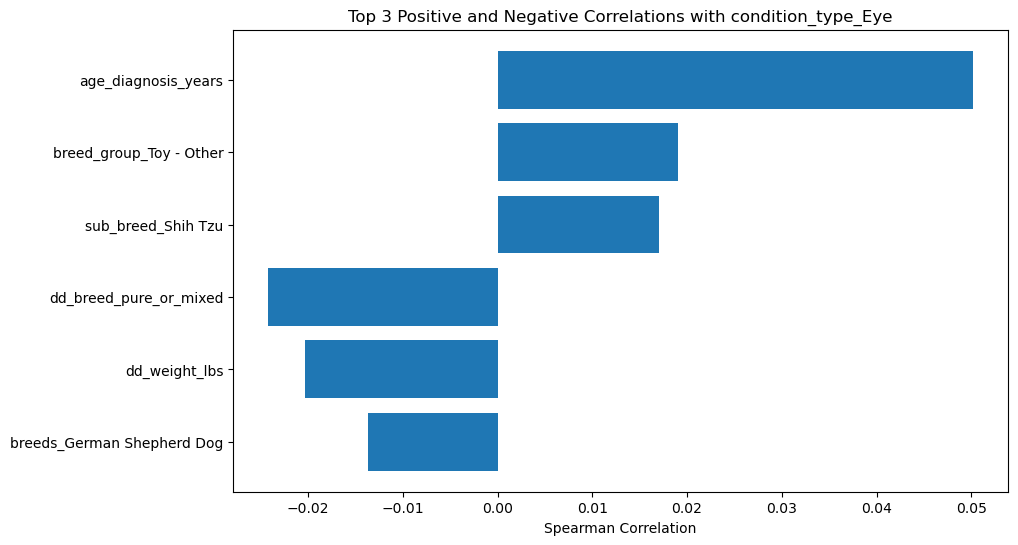

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


age_diagnosis_years     0.034815
breed_type_Retriever    0.019521
sub_breed_Non-sport     0.017263
Name: condition_type_Ear/Nose/Throat, dtype: float64


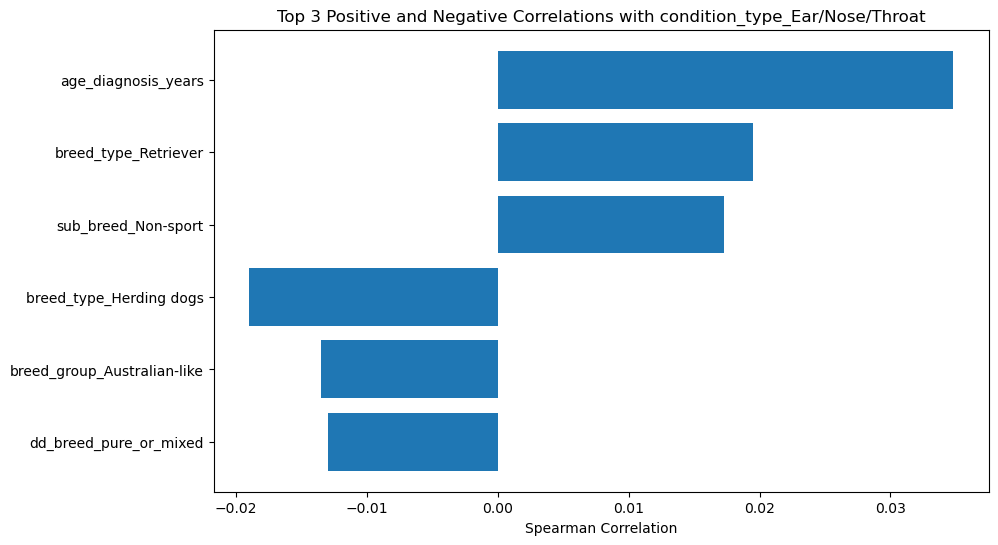

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


age_diagnosis_years    0.099231
breed_type_Toy dogs    0.042186
breeds_Chihuahua       0.033034
Name: condition_type_Mouth/Dental/Oral, dtype: float64


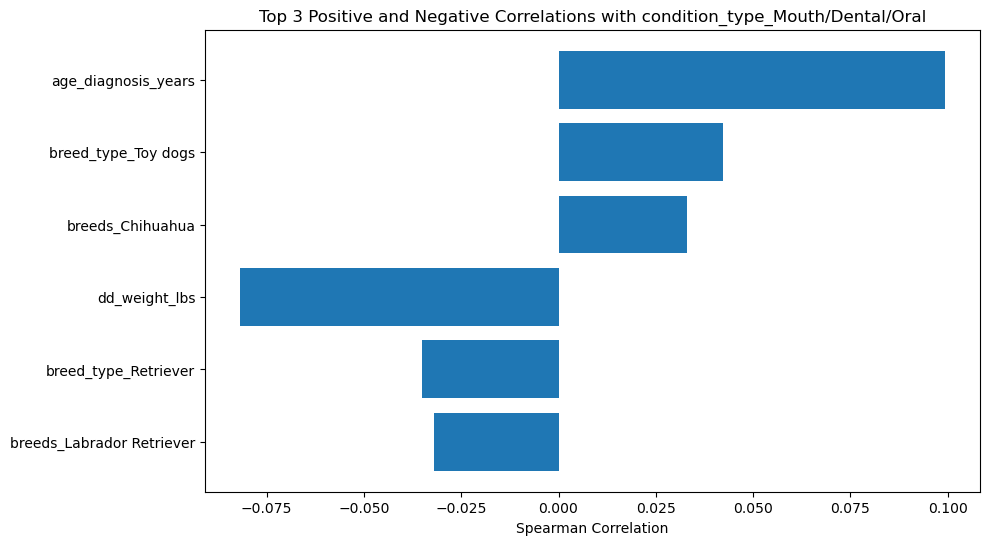

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


dd_weight_lbs                       0.037892
breed_group_Mastiff-like Group 1    0.034126
breed_type_Mastiff-Like             0.033231
Name: condition_type_Skin, dtype: float64


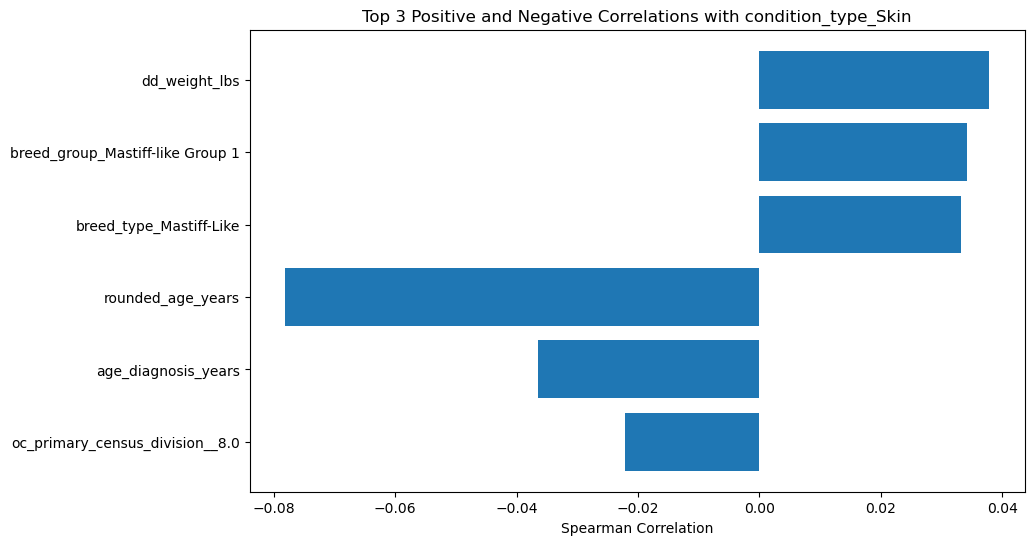

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


age_diagnosis_years                     0.046928
breeds_Cavalier King Charles Spaniel    0.034241
rounded_age_years                       0.028452
Name: condition_type_Cardiac, dtype: float64


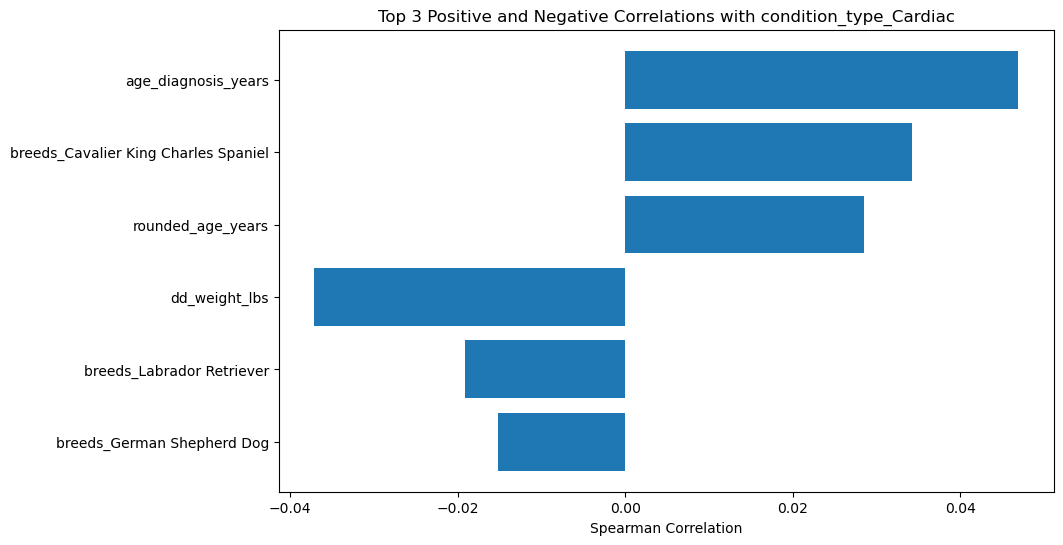

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


breeds_French Bulldog    0.034014
breeds_Bulldog           0.021843
age_diagnosis_years      0.019840
Name: condition_type_Respiratory, dtype: float64


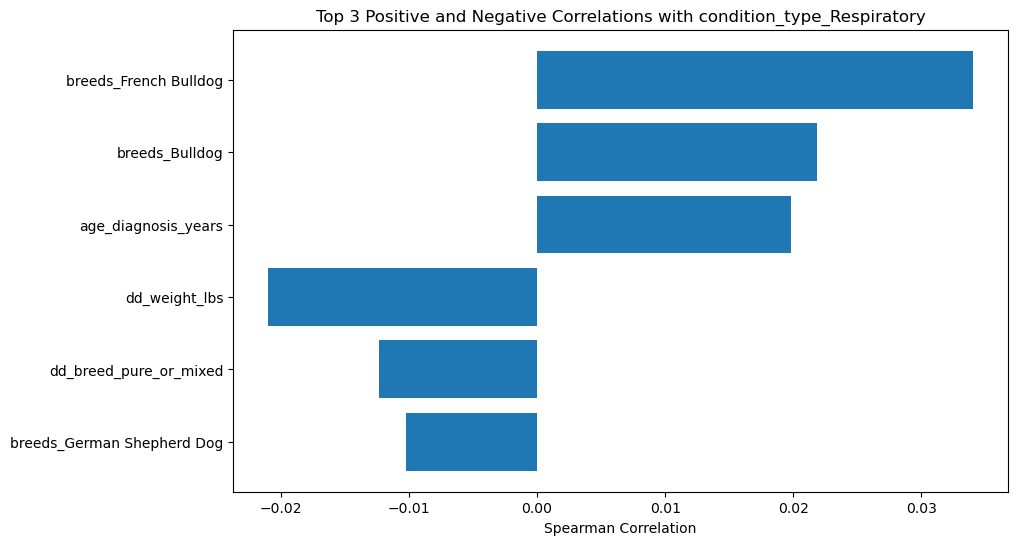

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


df_feedings_per_day                0.015729
breeds_Great Dane                  0.015405
sub_breed_Similar to retrievers    0.014618
Name: condition_type_Gastrointestinal, dtype: float64


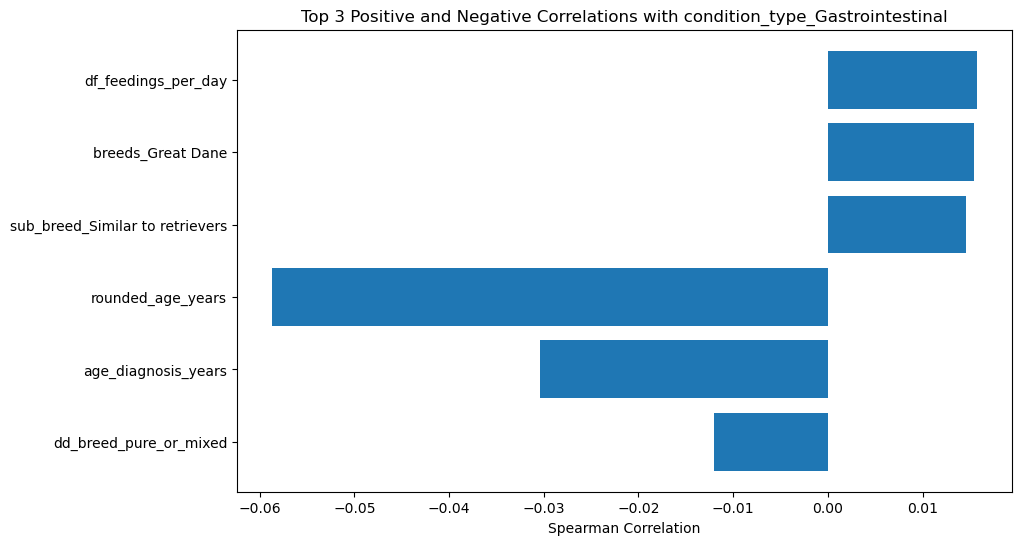

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


age_diagnosis_years         0.037033
rounded_age_years           0.018870
sub_breed_Small Terriers    0.015843
Name: condition_type_Liver/Pancreas, dtype: float64


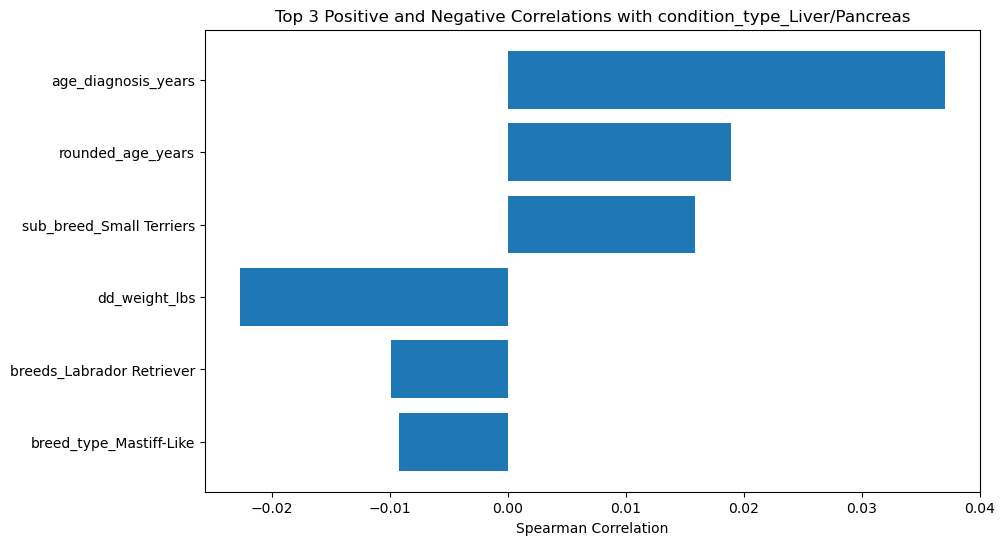

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


sex_2                       0.048261
age_diagnosis_years         0.029817
breeds_Doberman Pinscher    0.011971
Name: condition_type_Kidney/Urinary, dtype: float64


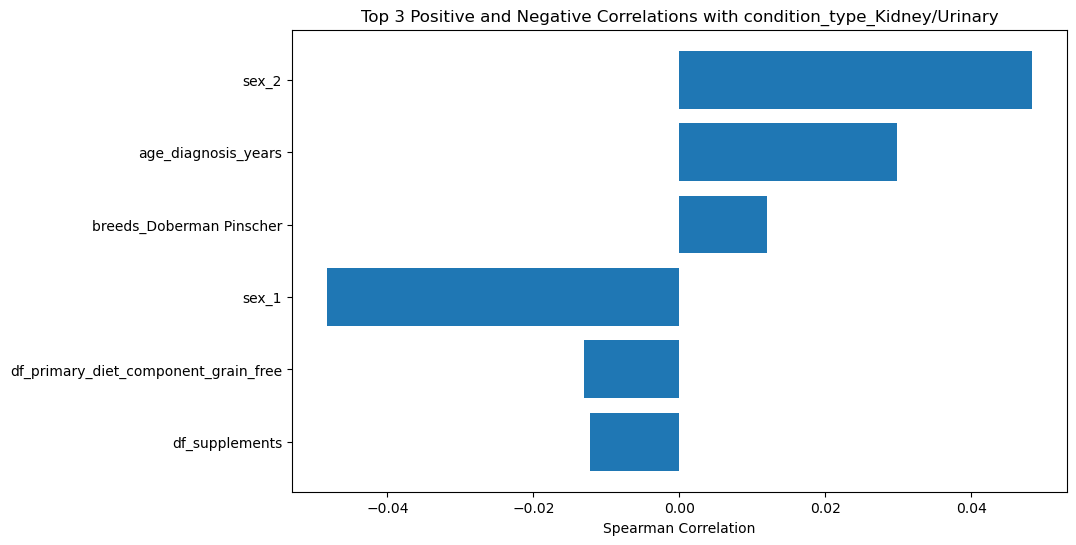

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


sub_breed_"True" Mastiffs           0.018281
sex_2                               0.014678
breed_group_Mastiff-like Group 1    0.014578
Name: condition_type_Reproductive, dtype: float64


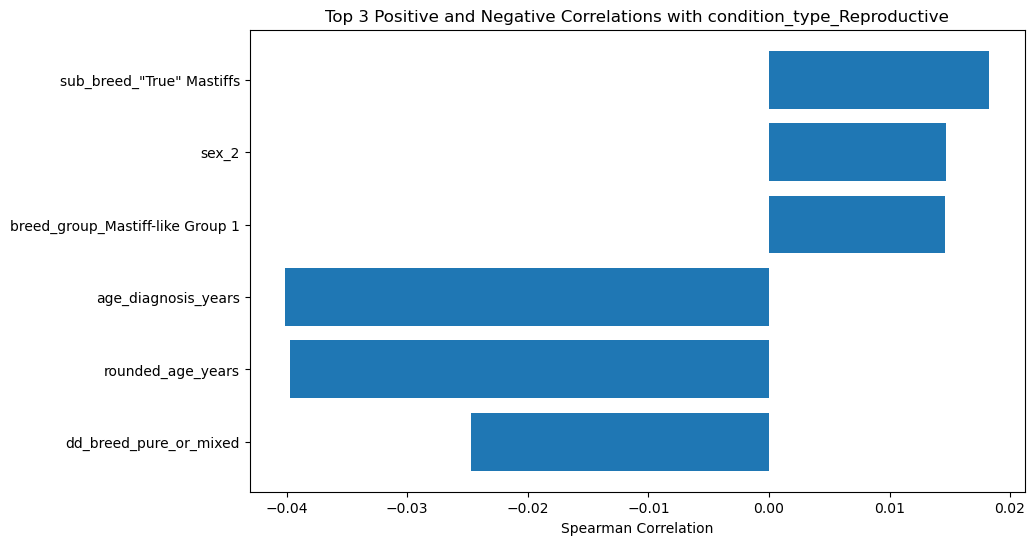

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


age_diagnosis_years                 0.052528
dd_weight_lbs                       0.028142
breed_group_Mastiff-like Group 1    0.017890
Name: condition_type_Bone/Orthopedic, dtype: float64


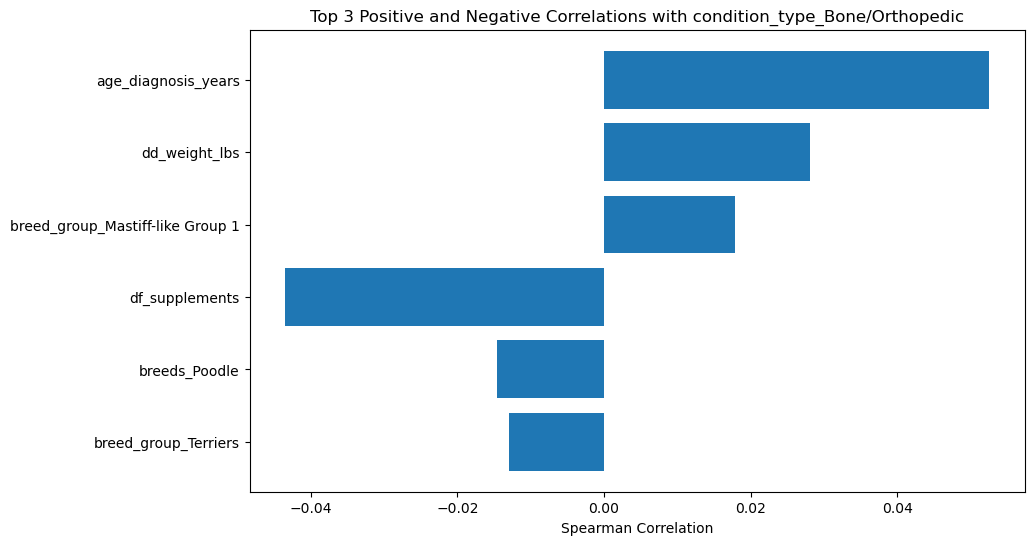

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


age_diagnosis_years    0.044507
rounded_age_years      0.030299
sex_1                  0.009180
Name: condition_type_Brain/Neurologic, dtype: float64


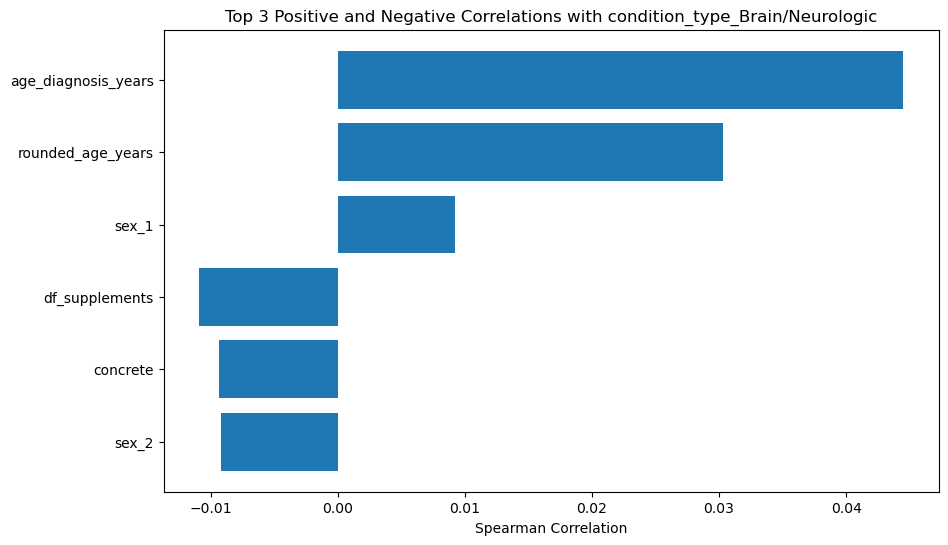

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


age_diagnosis_years    0.037340
rounded_age_years      0.022269
breed_group_Golden     0.007632
Name: condition_type_Endocrine, dtype: float64


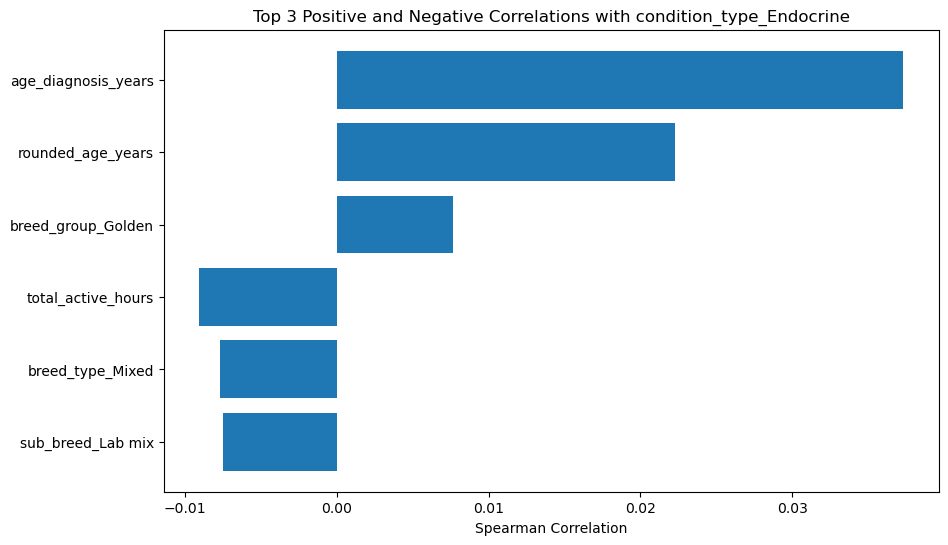

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


breeds_Doberman Pinscher       0.008569
breeds_Newfoundland            0.008457
breeds_Pembroke Welsh Corgi    0.007690
Name: condition_type_Hematopoietic, dtype: float64


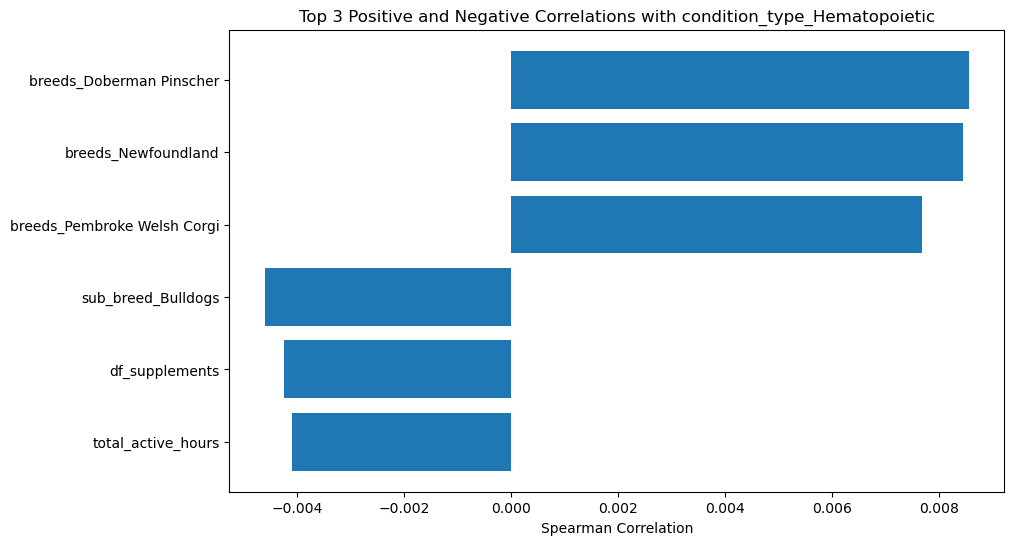

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


breeds_French Bulldog         0.010377
breeds_Collie                 0.008564
breeds_German Shepherd Dog    0.006361
Name: condition_type_Other Congenital Disorder, dtype: float64


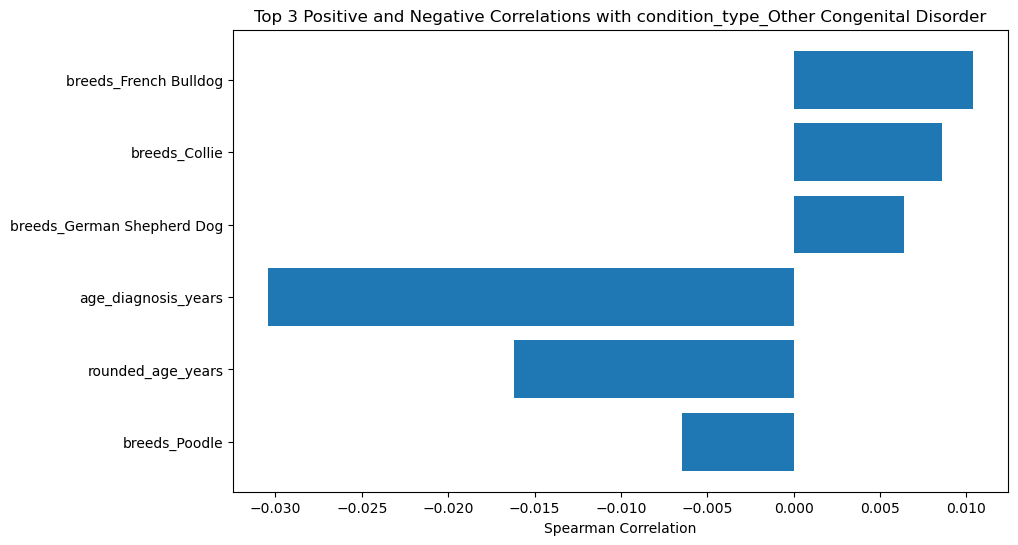

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


dd_weight_lbs                      0.035931
total_active_hours                 0.034777
oc_primary_census_division__1.0    0.023881
Name: condition_type_Infection/Parasites, dtype: float64


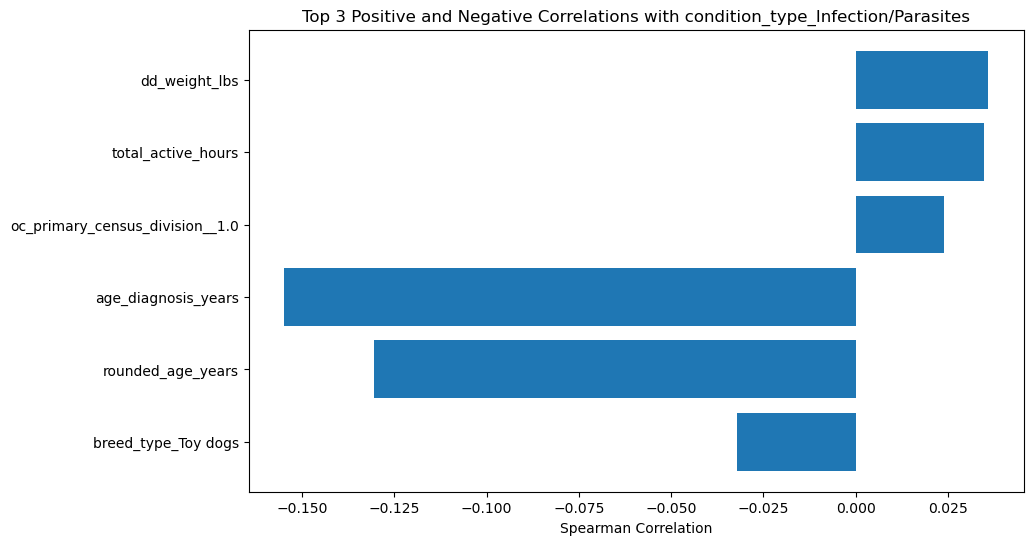

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


df_supplements                     0.018108
oc_primary_census_division__9.0    0.011541
od_max_education                   0.010798
Name: condition_type_Toxin Consumption, dtype: float64


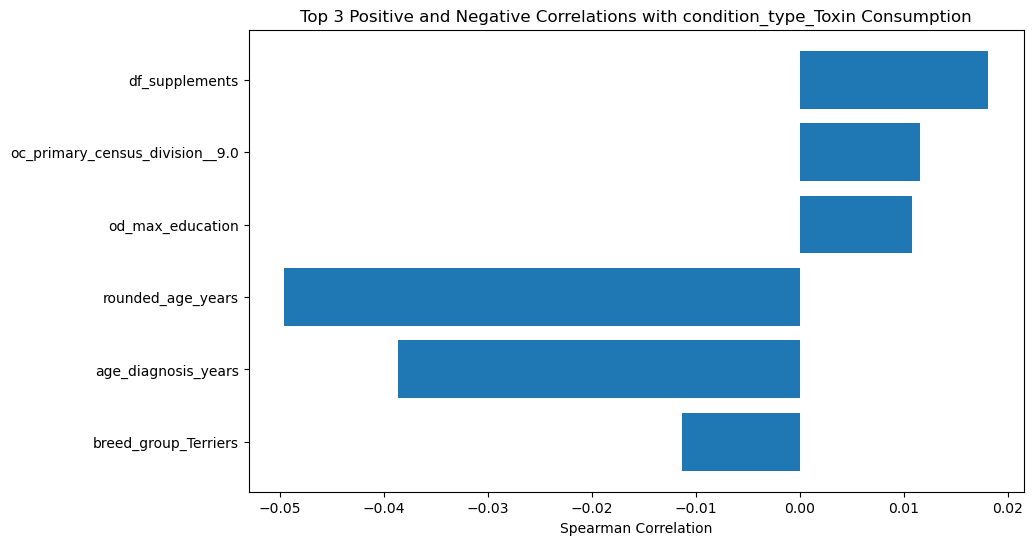

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


dd_weight_lbs              0.039902
total_active_hours         0.029454
breed_type_Mastiff-Like    0.027359
Name: condition_type_Trauma, dtype: float64


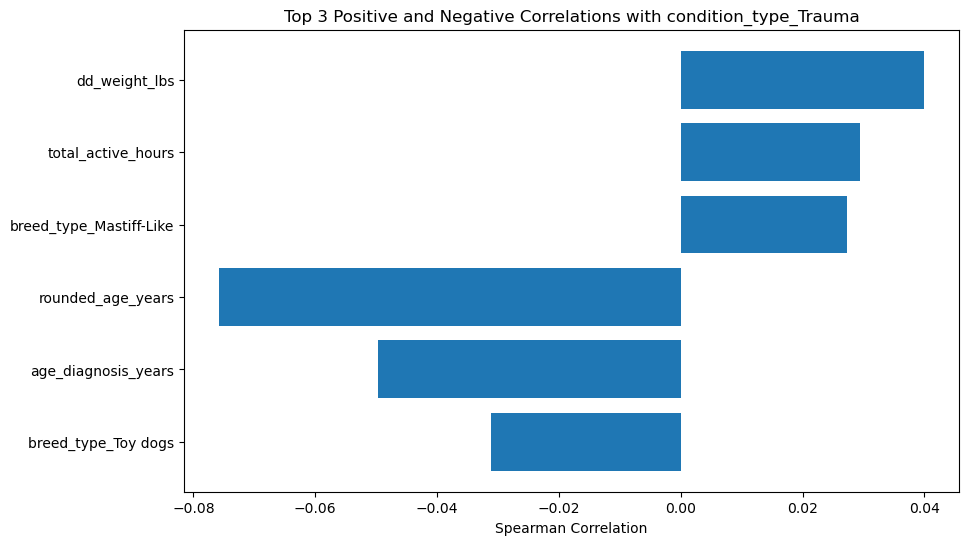

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


sub_breed_Shepherd - Other    0.007627
breeds_Collie                 0.007123
breeds_Greyhound              0.007088
Name: condition_type_Immune-mediated, dtype: float64


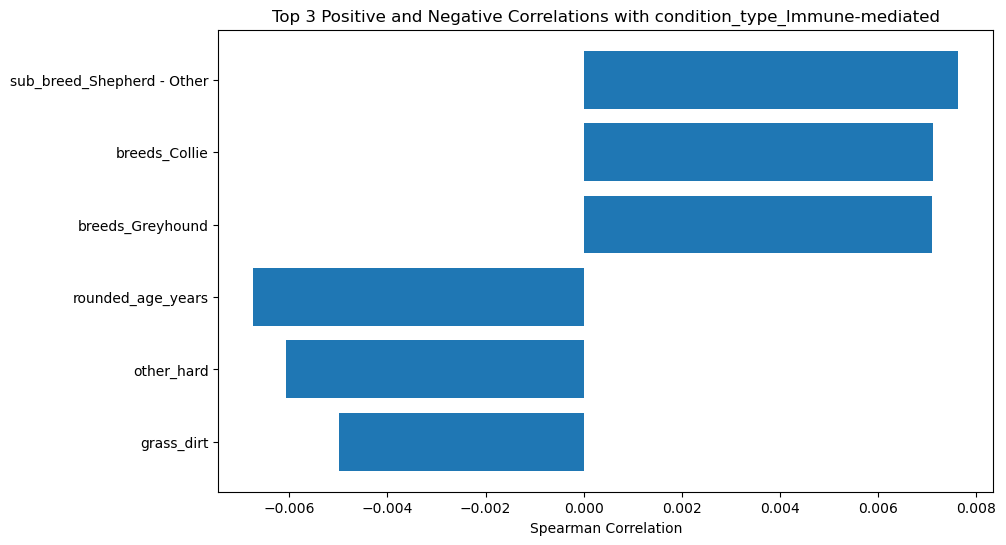

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


age_diagnosis_years    0.063595
rounded_age_years      0.026552
dd_weight_lbs          0.020388
Name: condition_type_cancer, dtype: float64


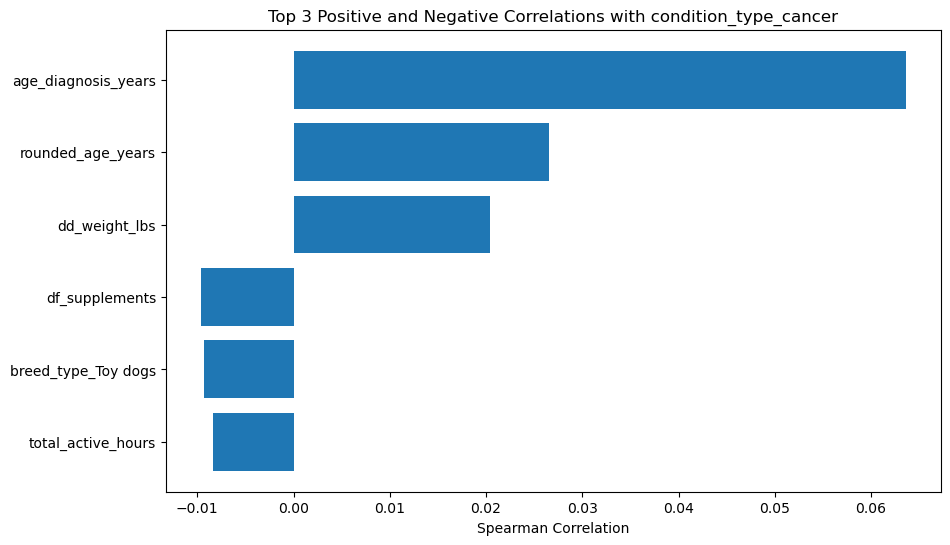

In [18]:
top_n = 3

for label in y_binary.columns:
    # Extract columns of relevance to specific tags
    correlations = spearman_correlation_results[label]
    
    # Extracting features of maximum top ten and minimum top ten correlations
    top_positive_features = correlations.nlargest(top_n)
    top_negative_features = correlations.nsmallest(top_n)
    
    # Merging these features
    top_features = top_positive_features.append(top_negative_features)

    print(top_features[: 3])
    
    plt.figure(figsize=(10, 6))
    plt.barh(top_features.index, top_features.values)
    plt.xlabel('Spearman Correlation')
    plt.title(f'Top {top_n} Positive and Negative Correlations with {label}')
    plt.gca().invert_yaxis()  # Invert the y-axis so that the most important features are at the top
    plt.show()



In [15]:
print(top_features)

age_diagnosis_years    0.063595
rounded_age_years      0.026552
dd_weight_lbs          0.020388
df_supplements        -0.009609
breed_type_Toy dogs   -0.009342
total_active_hours    -0.008397
Name: condition_type_cancer, dtype: float64
